In [1]:
!pip install sweetviz

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import sweetviz as sv

In [3]:
data1 = pd.read_csv("/Users/mayur/Documents/data_clean.csv.xls")

In [4]:
data1

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S


In [5]:
data1.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S


In [6]:
type(data1)

pandas.core.frame.DataFrame

In [7]:
data1.shape

(158, 10)

In [8]:
data1.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [10]:
data2 = data1.iloc[:,1:]

In [11]:
#The method .copy() is used here so that any changes made in new DataFrame don't get reflected in the original one
data = data2.copy()

In [12]:
data['Month']=pd.to_numeric(data['Month'],errors='coerce')
data['Temp C']=pd.to_numeric(data['Temp C'],errors='coerce')# coerce will introduce NA values for non numeric data in the columns

In [13]:
#OR

In [14]:
data['Weather']=data['Weather'].astype('category')  #data['Wind']=data['Wind'].astype('int64')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Temp C   157 non-null    float64 
 4   Month    157 non-null    float64 
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(5), int64(3)
memory usage: 10.3 KB


In [16]:
#Count of duplicated rows
data[data.duplicated()].shape

(1, 9)

In [17]:
data[data.duplicated()]   #show the duplicated row

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [18]:
data_cleaned1=data.drop_duplicates()

In [19]:
data_cleaned1

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
1,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
3,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
4,NaN,NaN,14.3,56.0,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,68.0,9.0,30,2010,68,S
153,41.0,190.0,7.4,67.0,5.0,1,2010,67,C
154,30.0,193.0,6.9,70.0,9.0,26,2010,70,PS
155,NaN,145.0,13.2,77.0,9.0,27,2010,77,S


In [20]:
data_cleaned1=data_cleaned1.drop('Temp C',axis=1)

In [21]:
data_cleaned2= data_cleaned1

In [22]:
data_cleaned2

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


In [23]:
data_cleaned3 = data_cleaned2.rename({'Solar.R':'Solar'},axis=1)

In [24]:
data_cleaned3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


<AxesSubplot:>

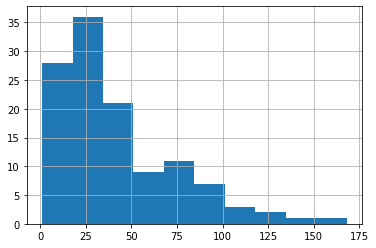

In [25]:
data_cleaned3.Ozone.hist()

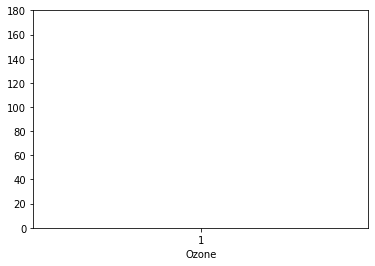

In [26]:
plt.boxplot(data_cleaned3.Ozone,vert=True)
plt.xlabel('Ozone')
plt.ylim(0,180)
plt.show()

<AxesSubplot:>

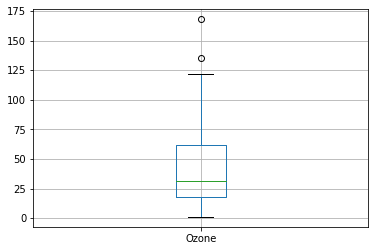

In [27]:
data_cleaned3.boxplot(column=['Ozone'])

<AxesSubplot:ylabel='Ozone'>

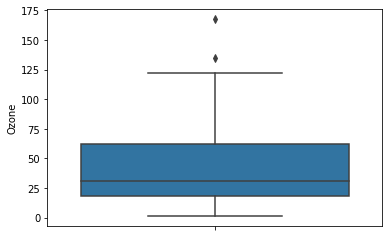

In [28]:
sns.boxplot(y='Ozone',data=data_cleaned3)

<AxesSubplot:>

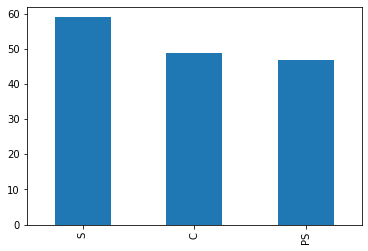

In [29]:
data['Weather'].value_counts().plot.bar()

<AxesSubplot:>

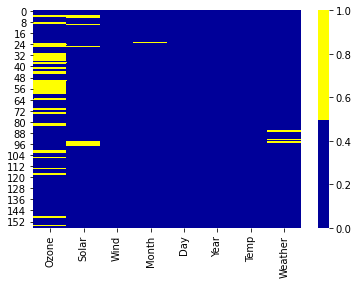

In [30]:
cols = data_cleaned3.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data_cleaned3[cols].isnull(),
            cmap=sns.color_palette(colours))

In [31]:
data_cleaned3[data_cleaned3.isnull().any(axis=1)].head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
4,NaN,NaN,14.3,5.0,5,2010,56,S
5,28.0,NaN,14.9,5.0,6,2010,66,C
9,NaN,194.0,8.6,5.0,10,2010,69,S
10,7.0,NaN,6.9,5.0,11,2010,74,C
23,32.0,92.0,12.0,NaN,24,2010,61,C


In [32]:
data_cleaned3.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [33]:
mean=data_cleaned3.Ozone.mean()

In [34]:
data_cleaned3['ozone']=data_cleaned3.Ozone.fillna(mean)

In [35]:
data_cleaned3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,ozone
0,41.0,190.0,7.4,5.0,1,2010,67,S,41.000000
1,36.0,118.0,8.0,5.0,2,2010,72,C,36.000000
2,12.0,149.0,12.6,5.0,3,2010,74,PS,12.000000
3,18.0,313.0,11.5,5.0,4,2010,62,S,18.000000
4,NaN,NaN,14.3,5.0,5,2010,56,S,41.815126
...,...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S,20.000000
153,41.0,190.0,7.4,5.0,1,2010,67,C,41.000000
154,30.0,193.0,6.9,9.0,26,2010,70,PS,30.000000
155,NaN,145.0,13.2,9.0,27,2010,77,S,41.815126


In [36]:
obj_columns=data_cleaned3[['Weather']]

In [37]:
obj_columns.isnull().sum()

Weather    3
dtype: int64

In [38]:
obj_columns= obj_columns.fillna(obj_columns.mode().iloc[0])

In [39]:
obj_columns

,Weather
0,S
1,C
2,PS
3,S
4,S
...,...
152,S
153,C
154,PS
155,S


In [40]:
#Join the data set with imputed object dataset
data_cleaned4 = pd.concat([data_cleaned3,obj_columns],axis=1)

In [41]:
data_cleaned4

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,ozone,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S,41.000000,S
1,36.0,118.0,8.0,5.0,2,2010,72,C,36.000000,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS,12.000000,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S,18.000000,S
4,NaN,NaN,14.3,5.0,5,2010,56,S,41.815126,S
...,...,...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S,20.000000,S
153,41.0,190.0,7.4,5.0,1,2010,67,C,41.000000,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS,30.000000,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S,41.815126,S


In [42]:
data_cleaned4.Ozone.isnull().sum()

38

In [43]:
data_cleaned4['Ozone']=data_cleaned4['Ozone'].fillna(mean)

In [44]:
data_cleaned4

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,ozone,Weather
0,41.000000,190.0,7.4,5.0,1,2010,67,S,41.000000,S
1,36.000000,118.0,8.0,5.0,2,2010,72,C,36.000000,C
2,12.000000,149.0,12.6,5.0,3,2010,74,PS,12.000000,PS
3,18.000000,313.0,11.5,5.0,4,2010,62,S,18.000000,S
4,41.815126,NaN,14.3,5.0,5,2010,56,S,41.815126,S
...,...,...,...,...,...,...,...,...,...,...
152,20.000000,223.0,11.5,9.0,30,2010,68,S,20.000000,S
153,41.000000,190.0,7.4,5.0,1,2010,67,C,41.000000,C
154,30.000000,193.0,6.9,9.0,26,2010,70,PS,30.000000,PS
155,41.815126,145.0,13.2,9.0,27,2010,77,S,41.815126,S


In [45]:
data_cleaned4.Ozone.isnull().sum()

0

In [46]:
data_cleaned4.Weather.isnull().sum()

Weather    3
Weather    0
dtype: int64

In [47]:
data_cleaned4

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,ozone,Weather
0,41.000000,190.0,7.4,5.0,1,2010,67,S,41.000000,S
1,36.000000,118.0,8.0,5.0,2,2010,72,C,36.000000,C
2,12.000000,149.0,12.6,5.0,3,2010,74,PS,12.000000,PS
3,18.000000,313.0,11.5,5.0,4,2010,62,S,18.000000,S
4,41.815126,NaN,14.3,5.0,5,2010,56,S,41.815126,S
...,...,...,...,...,...,...,...,...,...,...
152,20.000000,223.0,11.5,9.0,30,2010,68,S,20.000000,S
153,41.000000,190.0,7.4,5.0,1,2010,67,C,41.000000,C
154,30.000000,193.0,6.9,9.0,26,2010,70,PS,30.000000,PS
155,41.815126,145.0,13.2,9.0,27,2010,77,S,41.815126,S


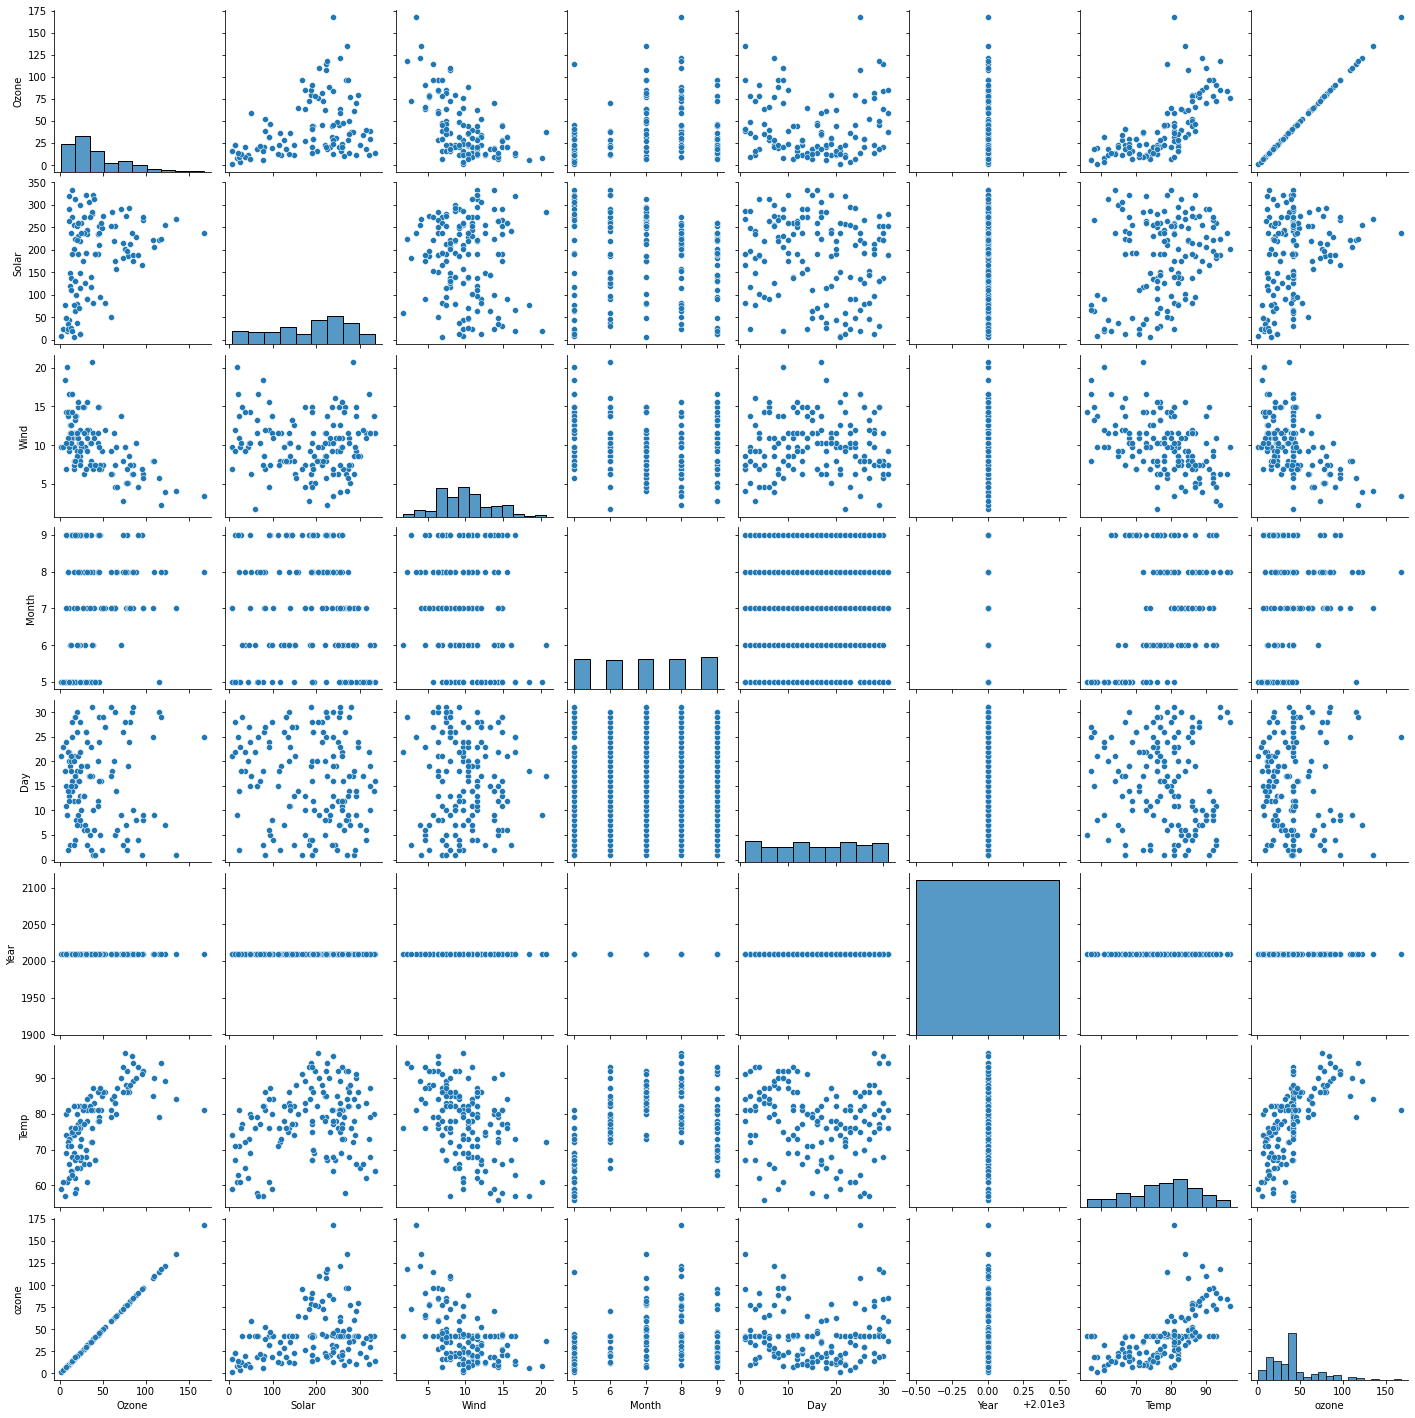

In [48]:
sns.pairplot(data_cleaned3)

In [49]:
data_cleaned3.corr()

,Ozone,Solar,Wind,Month,Day,Year,Temp,ozone
Ozone,1.000000,0.350274,-0.590270,0.147231,-0.025465,NaN,0.694404,1.000000
Solar,0.350274,1.000000,-0.057407,-0.094012,-0.155663,NaN,0.273558,0.308687
Wind,-0.590270,-0.057407,1.000000,-0.166216,0.029900,NaN,-0.441228,-0.520004
Month,0.147231,-0.094012,-0.166216,1.000000,0.050055,NaN,0.398516,0.132860
Day,-0.025465,-0.155663,0.029900,0.050055,1.000000,NaN,-0.122787,-0.021916
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.694404,0.273558,-0.441228,0.398516,-0.122787,NaN,1.000000,0.606500
ozone,1.000000,0.308687,-0.520004,0.132860,-0.021916,NaN,0.606500,1.000000


In [50]:
data_cleaned4

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,ozone,Weather
0,41.000000,190.0,7.4,5.0,1,2010,67,S,41.000000,S
1,36.000000,118.0,8.0,5.0,2,2010,72,C,36.000000,C
2,12.000000,149.0,12.6,5.0,3,2010,74,PS,12.000000,PS
3,18.000000,313.0,11.5,5.0,4,2010,62,S,18.000000,S
4,41.815126,NaN,14.3,5.0,5,2010,56,S,41.815126,S
...,...,...,...,...,...,...,...,...,...,...
152,20.000000,223.0,11.5,9.0,30,2010,68,S,20.000000,S
153,41.000000,190.0,7.4,5.0,1,2010,67,C,41.000000,C
154,30.000000,193.0,6.9,9.0,26,2010,70,PS,30.000000,PS
155,41.815126,145.0,13.2,9.0,27,2010,77,S,41.815126,S


In [74]:
data_cleaned4.Solar.isnull().sum()

0

In [57]:
mean2=data_cleaned4.Solar.mean()

In [58]:
mean2

185.36666666666667

In [59]:
data_cleaned4['Solar']=data_cleaned4['Solar'].fillna(mean2)

In [60]:
data_cleaned4

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,ozone,Weather
0,41.000000,190.000000,7.4,5.0,1,2010,67,S,41.000000,S
1,36.000000,118.000000,8.0,5.0,2,2010,72,C,36.000000,C
2,12.000000,149.000000,12.6,5.0,3,2010,74,PS,12.000000,PS
3,18.000000,313.000000,11.5,5.0,4,2010,62,S,18.000000,S
4,41.815126,185.366667,14.3,5.0,5,2010,56,S,41.815126,S
...,...,...,...,...,...,...,...,...,...,...
152,20.000000,223.000000,11.5,9.0,30,2010,68,S,20.000000,S
153,41.000000,190.000000,7.4,5.0,1,2010,67,C,41.000000,C
154,30.000000,193.000000,6.9,9.0,26,2010,70,PS,30.000000,PS
155,41.815126,145.000000,13.2,9.0,27,2010,77,S,41.815126,S


In [61]:
mean3= data_cleaned4.Month.mean()

In [62]:
data_cleaned4['Month']=data_cleaned4['Month'].fillna(mean3)

In [63]:
data_cleaned4

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,ozone,Weather
0,41.000000,190.000000,7.4,5.0,1,2010,67,S,41.000000,S
1,36.000000,118.000000,8.0,5.0,2,2010,72,C,36.000000,C
2,12.000000,149.000000,12.6,5.0,3,2010,74,PS,12.000000,PS
3,18.000000,313.000000,11.5,5.0,4,2010,62,S,18.000000,S
4,41.815126,185.366667,14.3,5.0,5,2010,56,S,41.815126,S
...,...,...,...,...,...,...,...,...,...,...
152,20.000000,223.000000,11.5,9.0,30,2010,68,S,20.000000,S
153,41.000000,190.000000,7.4,5.0,1,2010,67,C,41.000000,C
154,30.000000,193.000000,6.9,9.0,26,2010,70,PS,30.000000,PS
155,41.815126,145.000000,13.2,9.0,27,2010,77,S,41.815126,S


In [64]:
data_cleaned4=data_cleaned4.drop_duplicates()

In [65]:
data_cleaned4

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,ozone,Weather
0,41.000000,190.000000,7.4,5.0,1,2010,67,S,41.000000,S
1,36.000000,118.000000,8.0,5.0,2,2010,72,C,36.000000,C
2,12.000000,149.000000,12.6,5.0,3,2010,74,PS,12.000000,PS
3,18.000000,313.000000,11.5,5.0,4,2010,62,S,18.000000,S
4,41.815126,185.366667,14.3,5.0,5,2010,56,S,41.815126,S
...,...,...,...,...,...,...,...,...,...,...
152,20.000000,223.000000,11.5,9.0,30,2010,68,S,20.000000,S
153,41.000000,190.000000,7.4,5.0,1,2010,67,C,41.000000,C
154,30.000000,193.000000,6.9,9.0,26,2010,70,PS,30.000000,PS
155,41.815126,145.000000,13.2,9.0,27,2010,77,S,41.815126,S


In [66]:
data_cleaned4=data_cleaned4.drop('ozone',axis=1)

In [67]:
data_cleaned4

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Weather
0,41.000000,190.000000,7.4,5.0,1,2010,67,S,S
1,36.000000,118.000000,8.0,5.0,2,2010,72,C,C
2,12.000000,149.000000,12.6,5.0,3,2010,74,PS,PS
3,18.000000,313.000000,11.5,5.0,4,2010,62,S,S
4,41.815126,185.366667,14.3,5.0,5,2010,56,S,S
...,...,...,...,...,...,...,...,...,...
152,20.000000,223.000000,11.5,9.0,30,2010,68,S,S
153,41.000000,190.000000,7.4,5.0,1,2010,67,C,C
154,30.000000,193.000000,6.9,9.0,26,2010,70,PS,PS
155,41.815126,145.000000,13.2,9.0,27,2010,77,S,S


In [70]:
data_cleaned4=data_cleaned4.drop('Weather',axis=1)

In [71]:
data_cleaned4

,Ozone,Solar,Wind,Month,Day,Year,Temp
0,41.000000,190.000000,7.4,5.0,1,2010,67
1,36.000000,118.000000,8.0,5.0,2,2010,72
2,12.000000,149.000000,12.6,5.0,3,2010,74
3,18.000000,313.000000,11.5,5.0,4,2010,62
4,41.815126,185.366667,14.3,5.0,5,2010,56
...,...,...,...,...,...,...,...
152,20.000000,223.000000,11.5,9.0,30,2010,68
153,41.000000,190.000000,7.4,5.0,1,2010,67
154,30.000000,193.000000,6.9,9.0,26,2010,70
155,41.815126,145.000000,13.2,9.0,27,2010,77


In [73]:
data_cleaned4.isnull().sum()

Ozone    0
Solar    0
Wind     0
Month    0
Day      0
Year     0
Temp     0
dtype: int64

In [75]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [76]:
data_cleaned4.values

array([[4.10000000e+01, 1.90000000e+02, 7.40000000e+00, ...,
        1.00000000e+00, 2.01000000e+03, 6.70000000e+01],
       [3.60000000e+01, 1.18000000e+02, 8.00000000e+00, ...,
        2.00000000e+00, 2.01000000e+03, 7.20000000e+01],
       [1.20000000e+01, 1.49000000e+02, 1.26000000e+01, ...,
        3.00000000e+00, 2.01000000e+03, 7.40000000e+01],
       ...,
       [3.00000000e+01, 1.93000000e+02, 6.90000000e+00, ...,
        2.60000000e+01, 2.01000000e+03, 7.00000000e+01],
       [4.18151261e+01, 1.45000000e+02, 1.32000000e+01, ...,
        2.70000000e+01, 2.01000000e+03, 7.70000000e+01],
       [1.80000000e+01, 1.31000000e+02, 8.00000000e+00, ...,
        2.90000000e+01, 2.01000000e+03, 7.60000000e+01]])

In [77]:
array = data_cleaned4.values

In [78]:
scaler = MinMaxScaler()

In [79]:
rescaler = scaler.fit_transform(array[:,0:5])

In [81]:
set_printoptions(precision=2)
print(rescaler[0:5,:])

[[0.24 0.56 0.3  0.   0.  ]
 [0.21 0.34 0.33 0.   0.03]
 [0.07 0.43 0.57 0.   0.07]
 [0.1  0.94 0.52 0.   0.1 ]
 [0.24 0.55 0.66 0.   0.13]]


In [83]:
from sklearn.preprocessing import StandardScaler

In [85]:
scaler=StandardScaler()
rescaler=scaler.fit_transform(array)
set_printoptions(precision=2)
print(rescaler)

[[-0.03  0.05 -0.72 ... -1.67  0.   -1.15]
 [-0.21 -0.78 -0.55 ... -1.56  0.   -0.61]
 [-1.05 -0.42  0.76 ... -1.45  0.   -0.4 ]
 ...
 [-0.42  0.09 -0.87 ...  1.13  0.   -0.83]
 [ 0.   -0.47  0.94 ...  1.24  0.   -0.08]
 [-0.84 -0.63 -0.55 ...  1.46  0.   -0.19]]


In [86]:
sweet_report = sv.analyze(data)
sweet_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
